# ARIMA Models. Part 1: 이론 배경 및 알고리즘

기업 활용을 위한 ARIMA 모델링 튜토리얼의 첫 번째 노트북이다. 
time series 예측과 ARIMA 모델의 간단한 구현 내용을 담고 있다.

튜토리얼은 다음과 같이 구성된다:
* **Part 1.** ARIMA의 다양한 모델을 살펴보고, 파이썬으로 ARIMA를 구현해본다.
* **Part 2.** 구현된 ARIMA 모델을 활용해 실제 수요 데이터를 예측하는 것과 관련된 프로젝트를 개발한다.

## Data
데이터셋은 직접 생성하며, 외부 데이터셋을 사용하지 않는다.

## Resources
* Theoretical overview is adopted from Mill2019 (see [papers](https://github.com/ikatsov/tensor-house/blob/master/resources/papers.md))
* The implementation is partly based on [Ritchie Vink's tutorial](https://www.ritchievink.com/blog/2018/09/26/algorithm-breakdown-ar-ma-and-arima-models/)

---
# Basics of Time Series Analysis

---
## 1. Time Series and Stochastic Processes
$x_t$에서 $x$는 time series 변수이며, 여기서 t는 시간을 의미한다. $t=1$이면 첫 번째 관측, $t=T$이면 마지막 관측을 의미한다. 관측 기간이 $1,2,\ldots,T$로 이루어진 완전한 시간셋을 활용한다.

$x_1,\ldots,x_T$를 확률적 과정의 실재 관측으로 가정하고, 이를 통해 확률적 과정의 통계적 특성을 추정한다.

생성된 확률적 과정과 실제 관측치 사이의 관계를 파악하기 위해 다음 두 가지 개념의 이해가 필요하다.
* **에르고딕성(Ergodicity).** 유한한 실제 관측치(sample moment)의 평균값이 무한한 관측치의 분포를 대변할 수 있을 때 이를 에르고딕(ergodic)하다고 말할 수 있다.
* **정상성(Stationarity).** 정상성 프로세스에는 두 가지 핵심 개념이 있다: 
   * $t_1, t_2, \ldots, t_m$ 의 시간셋을 가지는 결합확률분포와  $t_{1+k}, t_{2+k}, \ldots, t_{m+k}$ for arbitrary $k$ (시간 축을 이동한) 시간셋을 가지는 결합확률분포가 동일할 때, 즉, 시간에 영향을 받지 않을때 강한 정상성이라고 말한다.
   * $x_k$의 평균과 분산이 모두 상수이고, 자기상관성이 $k$ 시간(시점이 아님)에 의존적일때 약한 정상성이라고 말한다.
   
   $
   \begin{aligned}
   &E(x_1) = E(x_2) = \ldots = E(x_T) = \mu \\
   &V(x_1) = V(x_2) = \ldots = V(x_T) = \sigma_x^2 \\
   &\gamma_k = Cov(x_t, x_{t-k}) = E((x_t - \mu)(x_{t-k} - \mu))
   \end{aligned}
   $

---
## 2.Useful Notation: Lag Operator(시차) and Difference Operator(차분)
Let us introduce the lag operator $B$ defined such that $B^j x_t = x_{t-j}$, so that $Bx_t = x_{t-1}$.

The first-difference of $x_t$ then can be defined as $\nabla x_t = x_t - x_{t-1} = x_t - Bx_t = (1-B)x_t$

---
## 3. Wold's Decomposition
Wold's theorem states that every weakly stationary, purely nondeterministic, stochastic process $x_t - \mu$ can be written as a linear combination of a sequence of uncrorrelated random variables:

$x_t - \mu = a_t + \psi_1 a_{t-1} + \psi_w a_{t-2} + \ldots = \sum_{j=0}^\infty \psi_j a_{t-j} \quad\quad \psi_0=1$

The $a_t$ are a sequence of uncorrelated random variables, known as *innovations*, drawn from a fixed distribution with

$
\begin{aligned}
&E(a_t) = 0 \\
&V(a_t) = E(a_t^2) = \sigma^2 \quad < \infty \\
&Cov(a_t, a_{t-k}) = E(a_t a_{t-k}) = 0, \quad for\ all\ k \ne 0 \\
\end{aligned}
$

This sequence is known as a white noise process and denoted as $a \sim WN(0,\sigma^2)$. 

---
## 4. Autoregressive Processes: AR(p)
Although Wold's decomposition provides a very generic framework for time series analysis, many real processes can be accurately described by simpler models obtained for specific choices of the $\psi$-weights. 

Assuming $\mu=0$ and choosing $\psi_j = \phi^j$ we obtain the following:

$
\begin{aligned}
x_t &= a_t + \phi a_{t-1} + \phi^2 a_{t-2} + \ldots \\
    &= a_t + \phi(a_{t-1} + \phi a_{t-2} + \ldots) \\
    &= \phi x_{t-1} + a_t
\end{aligned}
$

or 

$x_t - \phi x_{t-1} = a_t$

This is known as a first-order autoregressive process commonly denoted as AR(1).

The general autoregressive model of order $p$, that is AR(p), can be written as

$x_t - \phi_1 x_{t-1} - \phi_2 x_{t-2} - \ldots - \phi_p x_{t-p} = a_t$


or, in terms of the lag operator

$(1 - \phi_1B - \phi_2B^2 - \ldots - \phi_p B^p)x_t = \phi(B)x_t = a_t$

---
## 5. Moving Average Processes, MA(q)
The second important model can be obtained by chosing $\psi_1 = -\theta$ and $\psi_j=0$ for $j \ge 2$, so that:

$x_t = a_t - \theta a_{t-1}$

or 

$x_t = (1-\theta B)a_t$

This is known as the first-order moving average process commonly denoted as MA(1). The general MA of order $q$, that is MA(q) can be written as:

$x_t = a_t - \theta_1 a_{t-1} - \ldots - \theta_q a_{t-q}$

or

$x_t = (1 - \theta_1 B - \ldots - \theta_q B^q)a_t = \theta(B)a_t$

---
## 6. Autoregressive-Moving Average Model, ARMA(p, q)
ARMA models are obtained by combining AR(p) and MA(q) processes:

$x_t - \phi_1x_{t-1} - \ldots - \phi_p x_{t-p} = a_t - \theta_1 a_{t-1} - \ldots - \theta_q a_{t-q}$

or 

$\phi(B)x_t = \theta(B)a_t$

---
## 7. ARIMA(p, d, q) Model
The ARMA class of models relies on the assumption that the underlying process is weakly stationary, which restricts the mean and variance to be constant. Hoever, many time series are not stationary, and exhibit time-chanding means and/or variances. 

Certain nonstationary processes can be converted to stationary ones using differencing. Consider the following example: 

$x_t = x_{t-1} + a_t$

This is known as a *random walk*. If we include a constant into the right-hand side, we obtain a *random walk with a drift*:

$x_t = x_{t-1} + \theta_0 + a_t$

This process is clearly nonstationary. Assuming that it starts at $t=0$, we have the follwoing:

$x_t = x_0 +t\theta_0 + \sum_{i=0}^t a_{t-i}$

and thus its mean chages over time as follows:

$\mu_t = E(x_t) = x_0 + t\theta_0$

However, the first-difference of $x_t$ will be

$\nabla x_t = \theta_0 + a_t$

which is a stationary process. More generally, we can define autoregressive-integrated-moving average process ARIMA(p,d,q) as follows:

$\phi(B) \nabla^d x_t = \theta_0 + \theta(B)a_t$

---
## 8. Autocorrelation Functon
Many properties of a time series can be effeciently expressed and analyzed using the autocorrelation function (ACF) defined as follows:

$ACF(k) = Corr(x_t, x_{t-k}) = \frac{Cov(x_t, x_{t-k})}{(V(x_t)V(x_{t-k}))^{1/2}} = \frac{\gamma_k}{\gamma_0} = \frac{\gamma_k}{\sigma_x^2}$

---
## 9. Partial Autocorrelation
The ACF of AR(p) processes is a combination of exponents and sine waves. Consequently, it is infinite in extent which often makes it difficult to distinguish between the processes of different orders $p$. This probelm can be addressed by using partial autocorrelation that shows the autocorrelation of values $x_t$ and $x_{t-k}$ after the correlation between $x_t$ and the intermediate values $x_{t-1}, \ldots, x_{t-k+1}$ removed. 

The partial autocorrelation can be computed according to the following procedure:
1. First, we estimate $x_t$ and $x_{t-k}$ as a linear combinaton of intermediate terms which canbe done using linear regression:

$
\begin{aligned}
\hat{x}_t &= \alpha_1 x_{t-1} + \ldots + \alpha_{k-1} x_{t-k+1} \\
\hat{x}_{t-k} &= \beta_1 x_{t-1} + \ldots + \beta_{k-1} x_{t-k+1} \\
\end{aligned}
$

2. Second, we compute the partial correlation using the residuals of both predicted values:

$
PACF(k) = Corr(x_t - \hat{x}_t, x_{t-k} - \hat{x}_{t-k})
$

---
## 10. Properties of Autocorrelation Functions
ACF and PACF provide a toolkit for assessing orders $p$ and $q$ becasue of the following properties:

|           | AR(p)                   | MA(q)                       |   ARMA(p, q)  |
|-----------|-------------------------|-----------------------------|---------------|
| ACF       | Tails off               | Cuts off after lag $q$      | Tails off     | 
| PACF      | Cuts off after lag $p$  | Tails off                   | Tails off     |

---
# Basic ARIMA Implementation

In this section, we develop the ARIMA model from scrath to walk throught the details of the algorithm. 

---
### Step 1: Generate the White Noise Sequence

C:\Users\jcy12\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


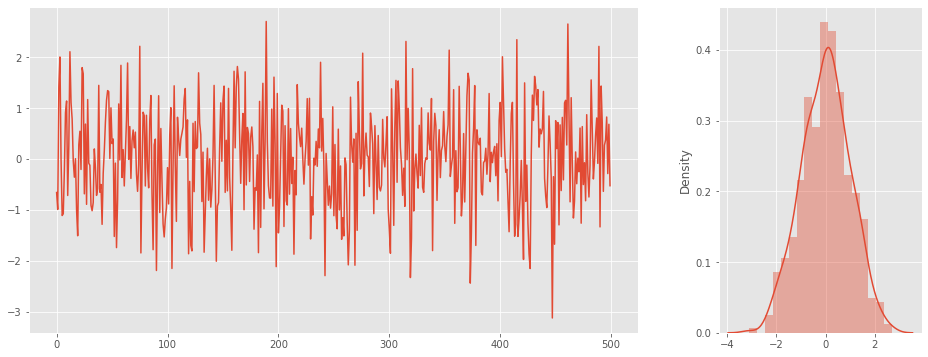

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy
from scipy import stats
import statsmodels.api as sm

plt.style.use('ggplot')

n = 500
fig, ax = plt.subplots(1,2, figsize=(16, 6), gridspec_kw={'width_ratios':[3, 1]})
eps = np.random.normal(size=n)
ax[0].plot(eps)
sns.distplot(eps, ax=ax[1])
plt.show()

---
### Step 2: AR Process

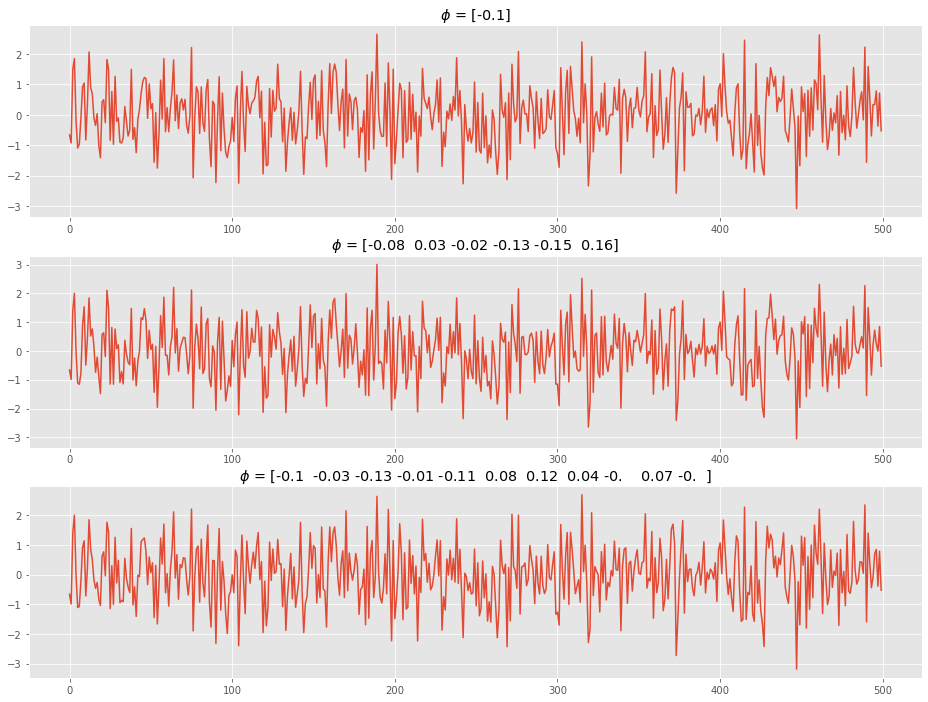

In [2]:
def ar_process(eps, phi):
    """
    Creates a AR(p) process with a zero mean. 
    eps: white noise signal
    phi: parameters of the process, p = len(phi)
    """
    phi = np.r_[1, phi][::-1] # Reverse the order of phi and add a 1 for current eps_t
    ar = eps.copy()
    offset = len(phi)
    for i in range(offset, ar.shape[0]):
        ar[i - 1] = ar[i - offset: i] @ phi
    return ar

fig = plt.figure(figsize=(16, 4 * 3))
a = 310
for i in range(0, 11, 5):
    a += 1
    phi = np.random.normal(0, 0.1, size=i + 1)
    plt.subplot(a)
    plt.title(f'$\\phi$ = {phi.round(2)}')
    plt.plot(ar_process(eps, phi))

---
### Step 3: MA Process

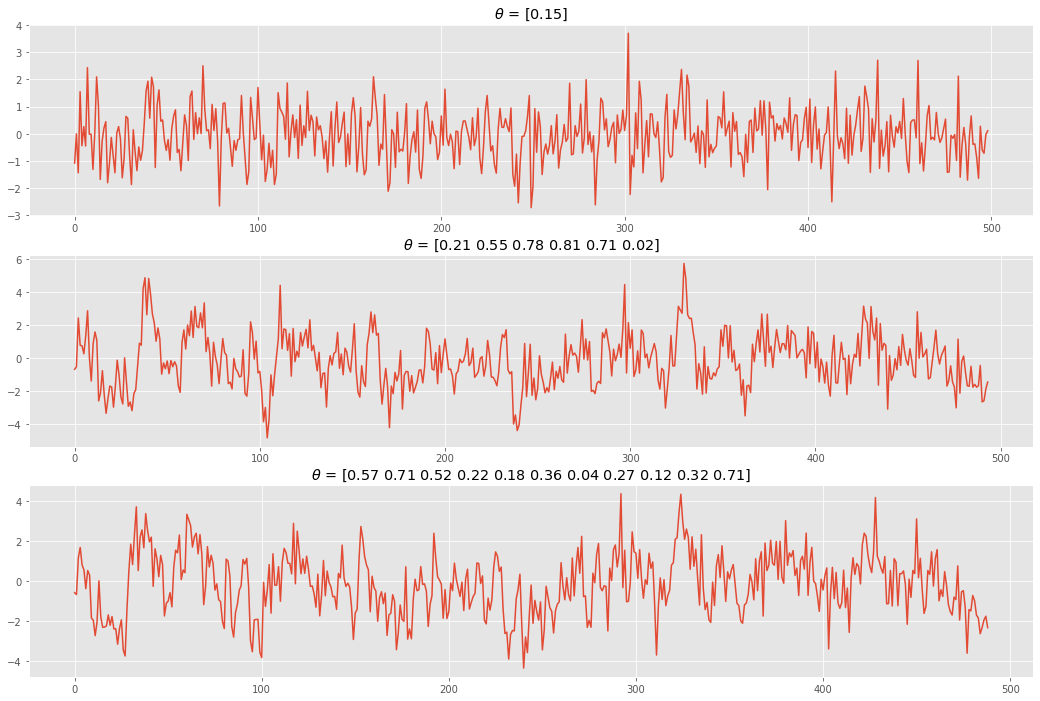

In [4]:
def ma_process(eps, theta):
    """
    Creates an MA(q) process with a zero mean.
    eps: white noise signal.
    theta: parameters of the process, q = len(theta)
    """
    return np.convolve(eps, [1] + list(theta), 'valid')

fig = plt.figure(figsize=(18, 4 * 3))
a = 310
for i in range(0, 11, 5):
    a += 1
    theta = np.random.uniform(0, 1, size = i + 1)
    plt.subplot(a)
    plt.title(f'$\\theta$ = {theta.round(2)}')
    plt.plot(ma_process(eps, theta))

---
## Step 4: Autocorrelation Function

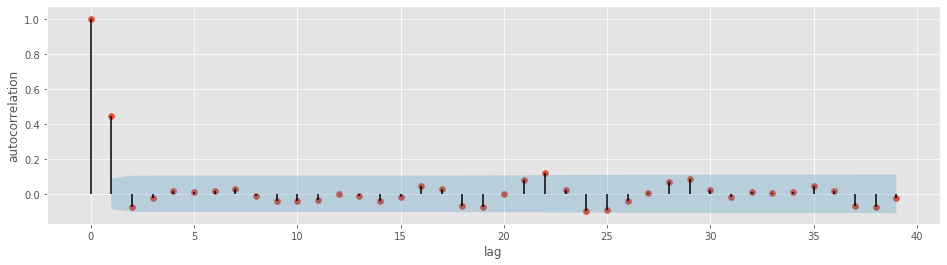

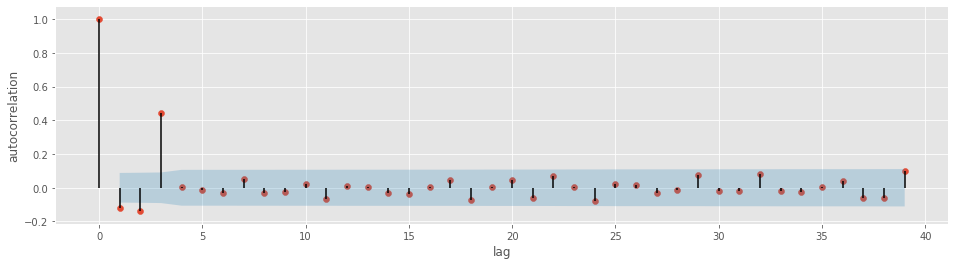

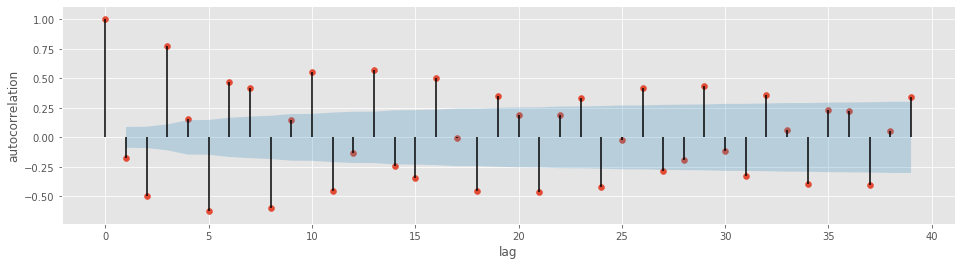

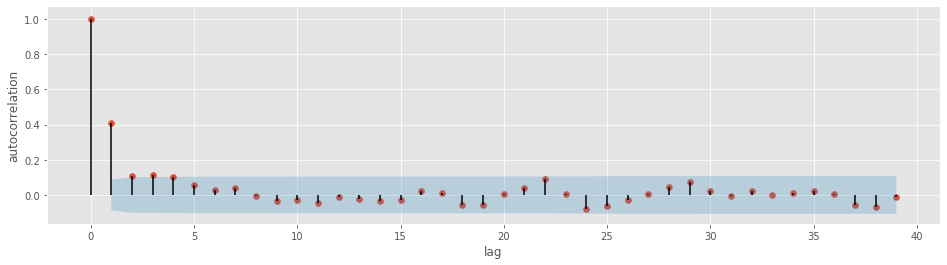

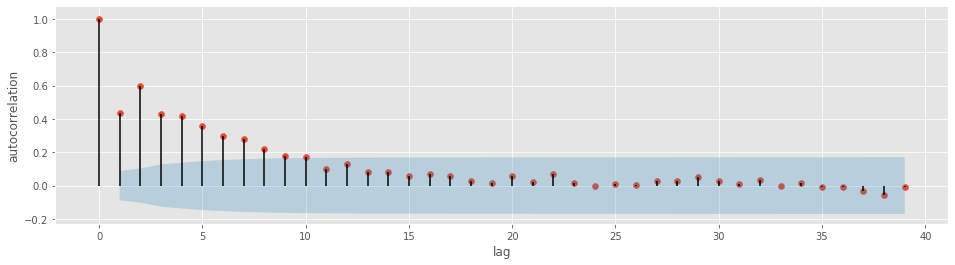

In [5]:
def pearson_correlation(x, y):
    return np.mean((x - x.mean()) * (y - y.mean())) / (x.std() * y.std())

def acf(x, lag=40):
    """
    Determine autocorrelation factors.
    x: time series
    lag: number of lags
    """
    return np.array([1] + [pearson_correlation(x[:-i], x[i:]) for i in range(1, lag)])

def bartletts_formula(acf_array, n):
    """
    Computes the Standard Error of an acf with Bartlet's formula
    See https://en.wikipedia.org/wiki/Correlogram
    acf_array: containing autocorrelation factors
    n: length of original time series sequence
    """
    # The first value has autocorrelation with it self. So that values is skipped
    se = np.zeros(len(acf_array) - 1)
    se[0] = 1 / np.sqrt(n)
    se[1:] = np.sqrt((1 + 2 * np.cumsum(acf_array[1:-1]**2)) / n )
    return se

def plot_correlation(x, func, alpha=0.05, lag=40):
    """
    x: time series
    alpha: statistical significance for confidence interval
    lag: number of lags
    """
    acf_val = func(x, lag)
    plt.figure(figsize=(16, 4))
    plt.vlines(np.arange(len(acf_val)), 0, acf_val)
    plt.scatter(np.arange(len(acf_val)), acf_val, marker='o')
    plt.xlabel('lag')
    plt.ylabel('autocorrelation')
    
    # Determine confidence interval
    ci = stats.norm.ppf(1 - alpha / 2.) * bartletts_formula(acf_val, len(x))
    plt.fill_between(np.arange(1, ci.shape[0] + 1), -ci, ci, alpha=0.25)

def plot_acf(x, alpha=0.05, lag=40):
    plot_correlation(x, acf, alpha, lag)

processes = [
    ma_process(eps, [1]),
    ma_process(eps, [0.2, -0.3, 0.8]),
    ar_process(eps, [0.2, -0.3, 0.8]),
    ar_process(eps, [0.5, -0.1, 0.1]),
    ar_process(eps, [0.2, 0.5, 0.1])
]

for p in processes:
    plot_acf(p)

---
## Step 5: Partial Autocorrelation

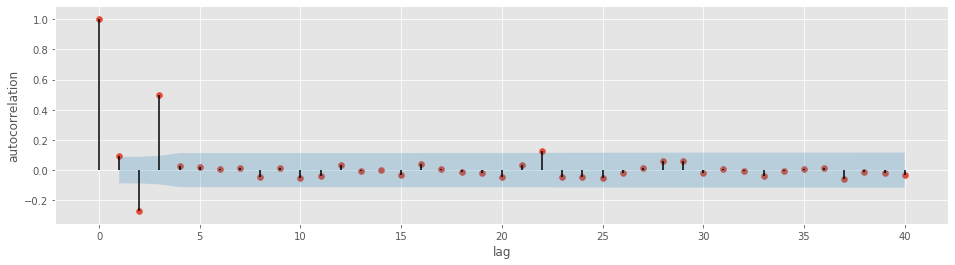

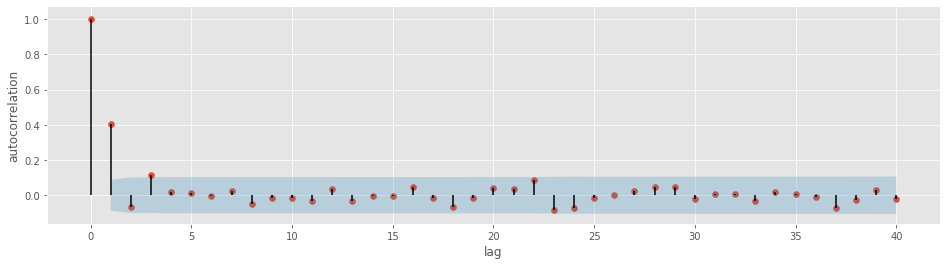

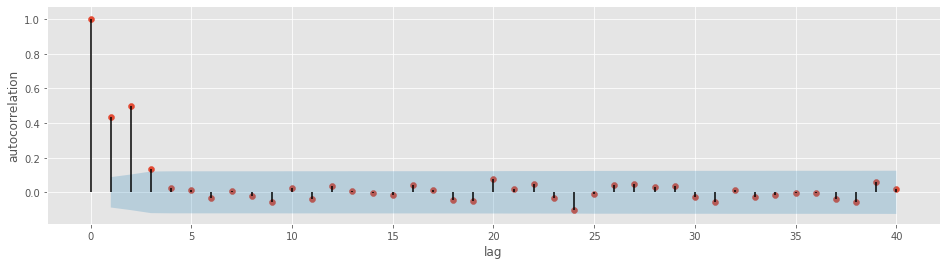

In [6]:
from sklearn.linear_model import LinearRegression

def lag_view(x, k):
    """
    returns an array where each x_i is replaced with its lags [x_i-1, x_i-2, ... x_i-k]
    """
    return np.array( [ x[i : i+k] for i in range(0, len(x)-k+1) ] )

def pacf(x, lag=40):
    """
    Partial autocorrelation function
    """
    y = [1, acf(x, 2)[1]]       # 1st and 2nd elments of PACF: PACF(0) = 1.0, PACF(1) = corr(x_t, x_t+1)
    for i in range(3, lag + 2): # compute 3rd element of PACF onwards
        lags = lag_view(x, i)
        xt = lags[:, 0]
        xt_lags = lags[:, 1:-1]
        # predict xt's based on xt_lags using linear regression
        xt_hat = LinearRegression(fit_intercept=False).fit(xt_lags, xt).predict(xt_lags) # explained part of x_t

        xt_k = lags[:, -1]
        # predict xt-k's based on xt_lags using linear regression
        xt_k_hat = LinearRegression(fit_intercept=False).fit(xt_lags, xt_k).predict(xt_lags) # explained part of x_t-k

        y.append(pearson_correlation(xt - xt_hat, xt_k - xt_k_hat)) # correlation of unexplained residuals
    
    return np.array(y)

def plot_pacf(x, alpha=0.05, lag=40, title=None):
    plot_correlation(x, pacf, alpha, lag)

plot_pacf(ar_process(eps, [0.3, -0.3, 0.5]))
plot_pacf(ar_process(eps, [0.5, -0.1, 0.1]))
plot_pacf(ar_process(eps, [0.2, 0.5, 0.1]))


---
## Step 6: ARIMA Model

In [7]:
def difference(x, d = 1):
    if d == 0:
        return x
    else:
        x = np.r_[x[0], np.diff(x)]
        return difference(x, d - 1)
    
def undo_difference(x, d = 1):
    if d == 1:
        return np.cumsum(x)
    else:
        x = np.cumsum(x)
        return undo_difference(x, d - 1)
    
class ARIMA():
    def __init__(self, q, d, p):
        self.p = p
        self.d = d
        self.q = q
        
    def prepare_features(self, x):
        if self.d > 0:
            x = difference(x, self.d)
        
        # AR process: features are lags
        ar_features = lag_view(np.r_[np.zeros(self.p), x], self.p)[:-1] # prepend with zero lags
        
        # MA process
        if self.q > 0:
            ar_model = LinearRegression().fit( ar_features, x )
            x_hat_ar = ar_model.predict(ar_features)
            residuals = x - x_hat_ar
            ma_features = lag_view(np.r_[np.zeros(self.q), residuals], self.q)[:-1] # prepend with zero lags
                                
        if self.p > 0 and self.q > 0:    # ARMA model 
            features = np.hstack((ar_features, ma_features))
        elif q > 0:                      # MA model
            features = ma_features
        else:                            # AR model
            features = ar_features
        
        return features
    
    def fit(self, x):
        features = self.prepare_features(x)
        self.model = LinearRegression().fit(features, x)
        return self
    
    def predict(self, x):
        features = self.prepare_features(x)
        y = self.model.predict(features)
        return self.return_output(y)
    
    def return_output(self, x):
        if self.d > 0:
            x = undo_difference(x, self.d) 
        return x
    
    def forecast(self, x, n):
        y = self.predict(x)
        
        y = np.r_[y, np.zeros(n)]
        for i in range(n):
            lags = np.r_[y[-(self.p + n) + i: -n + i], np.zeros(self.q)]
            y[x.shape[0] + i] = self.model.predict(lags[None, :])
        return self.return_output(y)

---
## Step 7: Fitting the ARIMA Model

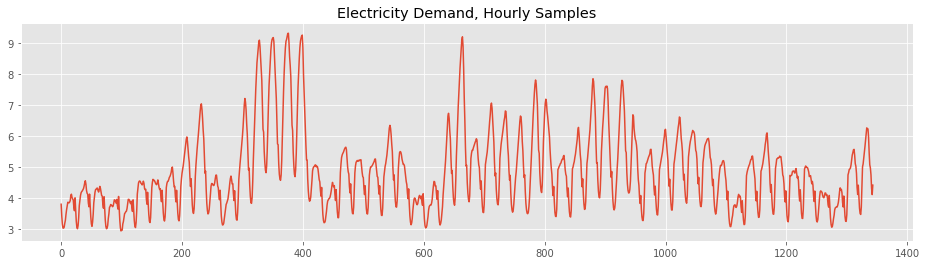

In [9]:
# loading a test dataset
import pandas as pd
data = pd.read_csv('../resources/time-series/electricity-demand-victoria.csv', comment='#', header=None).T
x = data[0].values.squeeze()

plt.figure(figsize=(16, 4))
plt.title('Electricity Demand, Hourly Samples')
plt.plot(x);

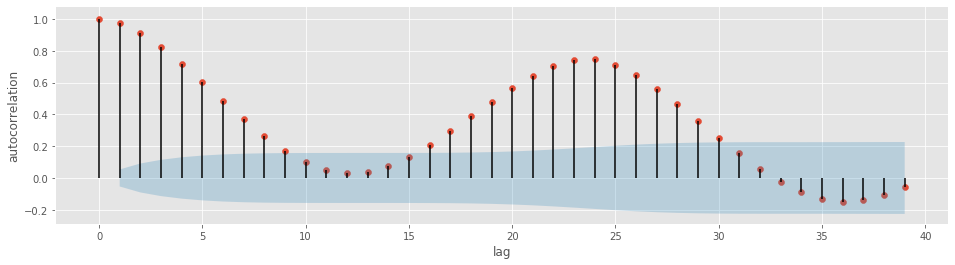

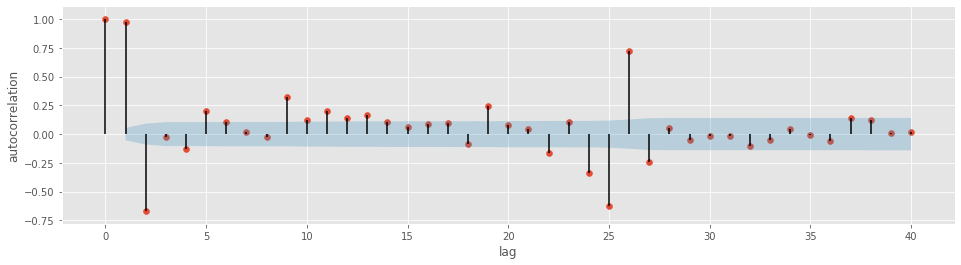

In [10]:
plot_acf(x)
plot_pacf(x)

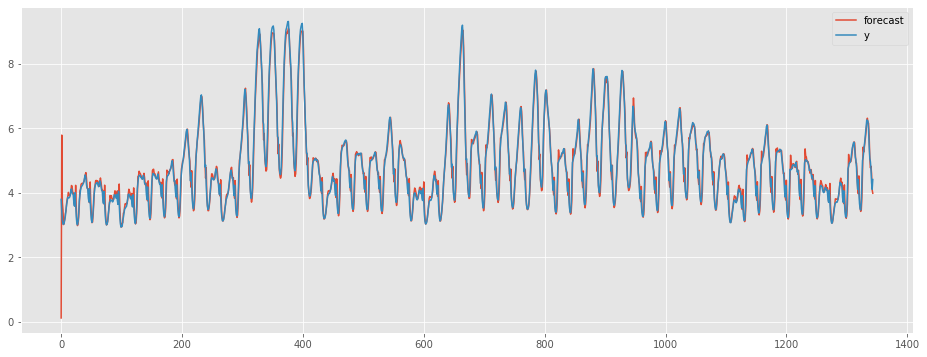

In [11]:
# fitting the model
q = 1
d = 0
p = 3

model = ARIMA(q = 1, d = 0, p = 3)
pred = model.fit(x).predict(x)

plt.figure(figsize=(16, 6))
ax = plt.subplot(111)
ax.plot(pred, label='forecast')
ax.plot(x, label='y')
plt.legend()

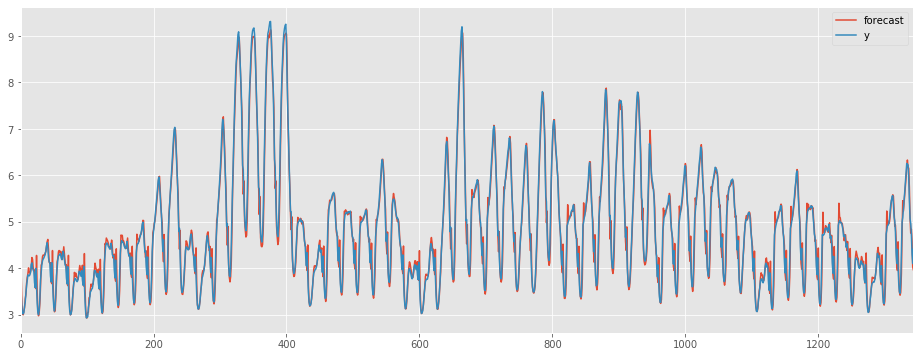

In [12]:
# compare with statsmodel implementation - similar but not exactly the same
results = sm.tsa.ARIMA(x, (p, d, q)).fit()
plt.figure(figsize=(16, 6))
ax = plt.subplot(111)
pred_sm = results.plot_predict(ax=ax)

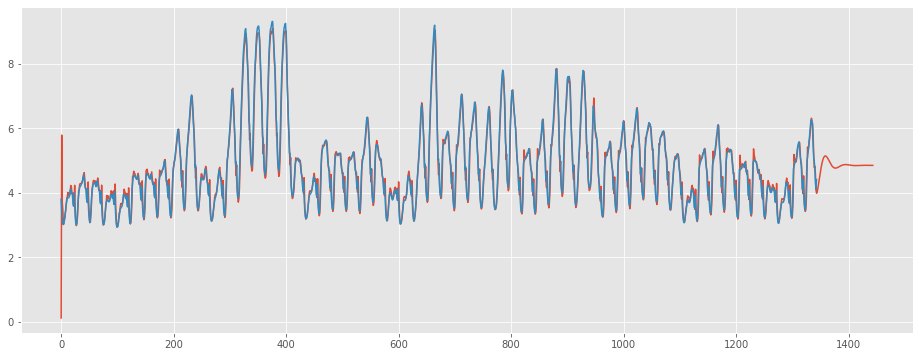

In [13]:
# forecasting
pred = model.forecast(x, 100)
plt.figure(figsize=(16, 6))
ax = plt.subplot(111)
ax.plot(pred)
ax.plot(x)